In [181]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [183]:
df = pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease')

In [185]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [187]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [189]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [191]:
df.duplicated().any()

True

In [193]:
df.duplicated().sum()

1

In [195]:
df.drop_duplicates(inplace=True)

In [197]:
df.duplicated().sum()

0

In [199]:
df['oldpeak'].mean()

0.8923076923076924

In [201]:
df['oldpeak']=df['oldpeak'].fillna(0.8)

In [203]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

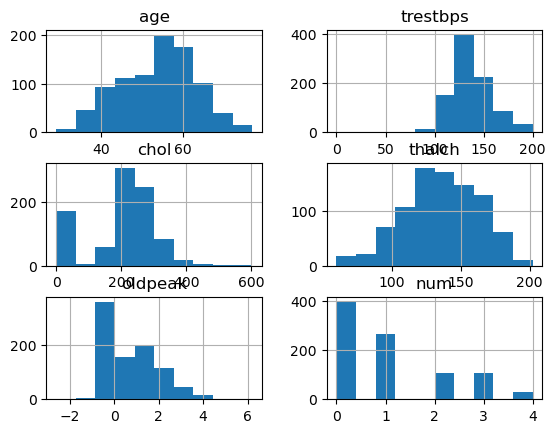

In [205]:
df.hist()
plt.show()

In [206]:
#convert bool to integer
df['fbs'] = df['fbs'].astype(int)

In [209]:
#convert all object columns to strings to avoid mixed types
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].astype(str)

In [211]:
df[column]

0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: num, Length: 907, dtype: int64

In [213]:
num_col=[i for i in df.columns if df[i].dtype!='O']
num_col

['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'num']

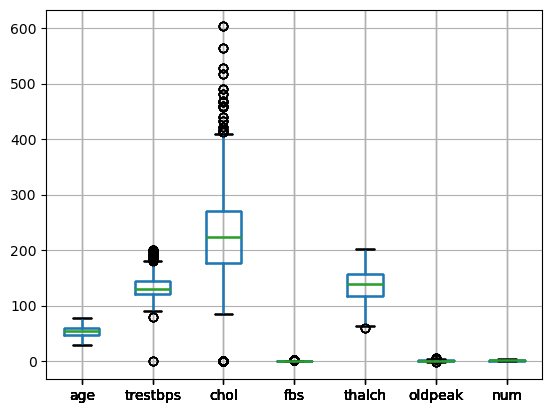

In [215]:
for i in num_col:
    df.boxplot(column=num_col)
plt.show()

In [216]:
#Encode categorical variables
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [219]:
df.rename(columns={'num':'target'}, inplace =True)

In [221]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,target
0,63,1,3,145,233,1,0,150,1,2.3,0,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0,0
4,57,1,0,110,201,0,1,126,3,1.5,1,0,0


In [223]:
feature=df.drop(columns=['target']) 
target = df['target'] 

In [225]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.3 , random_state=42)

In [227]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(634, 12)
(273, 12)
(634,)
(273,)


In [229]:
dec_tree=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=2)

In [231]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [233]:
y_predict=dec_tree.predict(x_test)

In [235]:
accuracy_score(y_test,y_predict)

0.5457875457875457

In [239]:
# Hyperparameter Tuning

In [155]:
params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,4,5,6,7,8,9]}

In [159]:
grid_search=GridSearchCV(dec_tree,params)

In [161]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']})

In [163]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'}

In [165]:
dec_tree1=DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=3)

In [243]:
dec_tree1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, splitter='random')

In [247]:
y_predict1=dec_tree1.predict(x_test)

In [249]:
accuracy_score(y_test,y_predict1)

0.5714285714285714

In [264]:
plt.figure(figsize=(10,10),dpi=1200)
tree.plot_tree(dec_tree1);

# Interview Questions

What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

HYPERPARAMETER MODELS, PARAMETERS AND HYPERPARAMETERS

▶ Model is a function which takes in the data and returns the output. ▶ Parameter is a variable which is used by the model to make predictions. These are the variables which are learned by the model. ▶ Hyperparameter is a variable which are also used by the model to make predictions. Unlike parameters, these are not learned by the model but tuned by the user. These hyperparameters are used to control/tune the inductive bias of the model.

▶Hyperparameter of decision tree is the maximum depth of the tree. This hyperparameter is used to control the inductive bias of the model. ▶ Ifthe maximumdepth is set too low, the model will not be able to learn the complex patterns in the data. This will lead to higher training error. ▶ Also, if the maximum depth is set too high, the model will be able to memorize the training data. Although it will give a lower training error, it will not be able to generalize well on the test data. This will lead to higher test error. ▶ Thuswecantunethemaximumdepthtothe optimum value to get a good balance between generalization and memorization.

HYPERPARAMETER TUNING ▶ Hyperparameter tuning is the process of finding the best hyperparameter values for a model. ▶ Whiletraining the model, we are learning the parameters to minimize the training error. However, hyperparameters should not be adjusted only by looking into the training error. This will lead to memorization. ▶ Weabsolutely cannot ever use the test data to tune the hyperparameters. Seeing the test data will render it useless for testing the model.10 ▶ So,wereserve a part of the training data to tune the hyperparameters. This part of the data is called the validation set. We use the validation set to tune the hyperparameters and then use the test set to evaluate the model.

# 2. What is the difference between the Label encoding and One-hot encoding?

Label Enconding:
Label Encoding is a common technique for converting categorical variables into numerical values

One-Hot Encoding:                         
One-Hot Encoding is another popular technique for treating categorical variables.                         
